In [22]:
from src import SpotifyService
from src.utils import *
# from src.constants import *
import pandas as pd 
import json
import matplotlib.pyplot as plt

In [2]:
service = SpotifyService()
# artist_id = service.get_artist_id_from_name('JPEGMAFIA')
# top_tracks = service.get_top_tracks_from_artist_id(artist_id)
# top_tracks

In [3]:
tracks_s = service.get_songs_from_artist_name('Kanye West')

In [4]:
tracks_s

0      4EWCNWgDS8707fNSZ1oaA5
1      4KW1lqgSr8TKrvBII0Brf8
2      5TRPicyLGbAF2LGBFbHGvO
3      3DK6m7It6Pw857FcQftMds
4      7rbECVPkY5UODxoOUVKZnA
                ...          
355    6Tj2eHQ2zAIgb4wxVFHBp8
356    7D6PaRc37JQALrMamQMJvP
357    0NTTd0fqQXVNpLEHCELyao
358    6tGBzlEQ75XQ92GjFZYXju
359    1lmKJ5MGt4UdHvia0ho3Uo
Length: 360, dtype: object

In [6]:
chunks = split_into_batches(tracks_s.values)

In [7]:
for chunk in chunks:
    print(len(chunk))

100
100
100
60


In [18]:
l = [{'danceability': 0.79, 'energy': 0.647, 'key': 10, 'loudness': -5.983, 'mode': 0, 'speechiness': 0.136, 'acousticness': 0.0515, 'instrumentalness': 0, 'liveness': 0.248, 'valence': 0.654, 'tempo': 87.999, 'type': 'audio_features', 'id': '4EWCNWgDS8707fNSZ1oaA5', 'uri': 'spotify:track:4EWCNWgDS8707fNSZ1oaA5', 'track_href': 'https://api.spotify.com/v1/tracks/4EWCNWgDS8707fNSZ1oaA5', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4EWCNWgDS8707fNSZ1oaA5', 'duration_ms': 211000, 'time_signature': 4}, {'danceability': 0.724, 'energy': 0.573, 'key': 7, 'loudness': -4.113, 'mode': 1, 'speechiness': 0.0549, 'acousticness': 0.118, 'instrumentalness': 0, 'liveness': 0.538, 'valence': 0.438, 'tempo': 113.088, 'type': 'audio_features', 'id': '4KW1lqgSr8TKrvBII0Brf8', 'uri': 'spotify:track:4KW1lqgSr8TKrvBII0Brf8', 'track_href': 'https://api.spotify.com/v1/tracks/4KW1lqgSr8TKrvBII0Brf8', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4KW1lqgSr8TKrvBII0Brf8', 'duration_ms': 135920, 'time_signature': 4}, {'danceability': 0.639, 'energy': 0.628, 'key': 6, 'loudness': -7.578, 'mode': 0, 'speechiness': 0.0399, 'acousticness': 0.0381, 'instrumentalness': 0, 'liveness': 0.386, 'valence': 0.43, 'tempo': 90.482, 'type': 'audio_features', 'id': '5TRPicyLGbAF2LGBFbHGvO', 'uri': 'spotify:track:5TRPicyLGbAF2LGBFbHGvO', 'track_href': 'https://api.spotify.com/v1/tracks/5TRPicyLGbAF2LGBFbHGvO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5TRPicyLGbAF2LGBFbHGvO', 'duration_ms': 237507, 'time_signature': 4}, {'danceability': 0.374, 'energy': 0.568, 'key': 1, 'loudness': -3.825, 'mode': 0, 'speechiness': 0.109, 'acousticness': 0.219, 'instrumentalness': 0.00219, 'liveness': 0.513, 'valence': 0.111, 'tempo': 84.733, 'type': 'audio_features', 'id': '3DK6m7It6Pw857FcQftMds', 'uri': 'spotify:track:3DK6m7It6Pw857FcQftMds', 'track_href': 'https://api.spotify.com/v1/tracks/3DK6m7It6Pw857FcQftMds', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3DK6m7It6Pw857FcQftMds', 'duration_ms': 547733, 'time_signature': 4}, {'danceability': 0.542, 'energy': 0.466, 'key': 0, 'loudness': -8.665, 'mode': 1, 'speechiness': 0.0831, 'acousticness': 0.141, 'instrumentalness': 0.000445, 'liveness': 0.125, 'valence': 0.124, 'tempo': 191.385, 'type': 'audio_features', 'id': '7rbECVPkY5UODxoOUVKZnA', 'uri': 'spotify:track:7rbECVPkY5UODxoOUVKZnA', 'track_href': 'https://api.spotify.com/v1/tracks/7rbECVPkY5UODxoOUVKZnA', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7rbECVPkY5UODxoOUVKZnA', 'duration_ms': 243440, 'time_signature': 4}, {'danceability': 0.367, 'energy': 0.665, 'key': 1, 'loudness': -2.821, 'mode': 1, 'speechiness': 0.0465, 'acousticness': 0.145, 'instrumentalness': 0, 'liveness': 0.113, 'valence': 0.31, 'tempo': 148.913, 'type': 'audio_features', 'id': '3sNVsP50132BTNlImLx70i', 'uri': 'spotify:track:3sNVsP50132BTNlImLx70i', 'track_href': 'https://api.spotify.com/v1/tracks/3sNVsP50132BTNlImLx70i', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3sNVsP50132BTNlImLx70i', 'duration_ms': 229147, 'time_signature': 4}, {'danceability': 0.669, 'energy': 0.419, 'key': 1, 'loudness': -6.724, 'mode': 0, 'speechiness': 0.522, 'acousticness': 0.376, 'instrumentalness': 0, 'liveness': 0.187, 'valence': 0.0397, 'tempo': 109.813, 'type': 'audio_features', 'id': '3s7MCdXyWmwjdcWh7GWXas', 'uri': 'spotify:track:3s7MCdXyWmwjdcWh7GWXas', 'track_href': 'https://api.spotify.com/v1/tracks/3s7MCdXyWmwjdcWh7GWXas', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3s7MCdXyWmwjdcWh7GWXas', 'duration_ms': 215320, 'time_signature': 4}, {'danceability': 0.629, 'energy': 0.696, 'key': 1, 'loudness': -5.572, 'mode': 0, 'speechiness': 0.348, 'acousticness': 0.0195, 'instrumentalness': 0, 'liveness': 0.0554, 'valence': 0.623, 'tempo': 93.034, 'type': 'audio_features', 'id': '1PS1QMdUqOal0ai3Gt7sDQ', 'uri': 'spotify:track:1PS1QMdUqOal0ai3Gt7sDQ', 'track_href': 'https://api.spotify.com/v1/tracks/1PS1QMdUqOal0ai3Gt7sDQ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1PS1QMdUqOal0ai3Gt7sDQ', 'duration_ms': 207627, 'time_signature': 4}, {'danceability': 0.657, 'energy': 0.734, 'key': 8, 'loudness': -4.832, 'mode': 0, 'speechiness': 0.484, 'acousticness': 0.149, 'instrumentalness': 0, 'liveness': 0.139, 'valence': 0.434, 'tempo': 91.03, 'type': 'audio_features', 'id': '5SkRLpaGtvYPhw02vZhQQ9', 'uri': 'spotify:track:5SkRLpaGtvYPhw02vZhQQ9', 'track_href': 'https://api.spotify.com/v1/tracks/5SkRLpaGtvYPhw02vZhQQ9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5SkRLpaGtvYPhw02vZhQQ9', 'duration_ms': 223507, 'time_signature': 4}, {'danceability': 0.667, 'energy': 0.747, 'key': 1, 'loudness': -7.059, 'mode': 1, 'speechiness': 0.189, 'acousticness': 0.337, 'instrumentalness': 0, 'liveness': 0.115, 'valence': 0.918, 'tempo': 86.917, 'type': 'audio_features', 'id': '4iz9lGMjU1lXS51oPmUmTe', 'uri': 'spotify:track:4iz9lGMjU1lXS51oPmUmTe', 'track_href': 'https://api.spotify.com/v1/tracks/4iz9lGMjU1lXS51oPmUmTe', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4iz9lGMjU1lXS51oPmUmTe', 'duration_ms': 203493, 'time_signature': 4}, {'danceability': 0.435, 'energy': 0.76, 'key': 8, 'loudness': -4.935, 'mode': 0, 'speechiness': 0.0721, 'acousticness': 0.0175, 'instrumentalness': 0, 'liveness': 0.158, 'valence': 0.206, 'tempo': 80.082, 'type': 'audio_features', 'id': '1UGD3lW3tDmgZfAVDh6w7r', 'uri': 'spotify:track:1UGD3lW3tDmgZfAVDh6w7r', 'track_href': 'https://api.spotify.com/v1/tracks/1UGD3lW3tDmgZfAVDh6w7r', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1UGD3lW3tDmgZfAVDh6w7r', 'duration_ms': 351947, 'time_signature': 4}, {'danceability': 0.617, 'energy': 0.717, 'key': 10, 'loudness': -7.858, 'mode': 0, 'speechiness': 0.153, 'acousticness': 0.00564, 'instrumentalness': 0, 'liveness': 0.408, 'valence': 0.49, 'tempo': 103.992, 'type': 'audio_features', 'id': '0j2T0R9dR9qdJYsB7ciXhf', 'uri': 'spotify:track:0j2T0R9dR9qdJYsB7ciXhf', 'track_href': 'https://api.spotify.com/v1/tracks/0j2T0R9dR9qdJYsB7ciXhf', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0j2T0R9dR9qdJYsB7ciXhf', 'duration_ms': 311867, 'time_signature': 4}, {'danceability': 0.573, 'energy': 0.545, 'key': 7, 'loudness': -4.247, 'mode': 0, 'speechiness': 0.0288, 'acousticness': 0.0969, 'instrumentalness': 0, 'liveness': 0.329, 'valence': 0.297, 'tempo': 83.378, 'type': 'audio_features', 'id': '7vgTNTaEz3CsBZ1N4YQalM', 'uri': 'spotify:track:7vgTNTaEz3CsBZ1N4YQalM', 'track_href': 'https://api.spotify.com/v1/tracks/7vgTNTaEz3CsBZ1N4YQalM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7vgTNTaEz3CsBZ1N4YQalM', 'duration_ms': 271387, 'time_signature': 4}, {'danceability': 0.596, 'energy': 0.62, 'key': 5, 'loudness': -6.133, 'mode': 0, 'speechiness': 0.039, 'acousticness': 0.0122, 'instrumentalness': 0, 'liveness': 0.82, 'valence': 0.102, 'tempo': 80.029, 'type': 'audio_features', 'id': '0mEdbdeRFQwBhN4xfyIeUM', 'uri': 'spotify:track:0mEdbdeRFQwBhN4xfyIeUM', 'track_href': 'https://api.spotify.com/v1/tracks/0mEdbdeRFQwBhN4xfyIeUM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0mEdbdeRFQwBhN4xfyIeUM', 'duration_ms': 271600, 'time_signature': 4}, {'danceability': 0.531, 'energy': 0.803, 'key': 1, 'loudness': -3.284, 'mode': 1, 'speechiness': 0.0717, 'acousticness': 0.0796, 'instrumentalness': 1.71e-05, 'liveness': 0.176, 'valence': 0.221, 'tempo': 142.113, 'type': 'audio_features', 'id': '22L7bfCiAkJo5xGSQgmiIO', 'uri': 'spotify:track:22L7bfCiAkJo5xGSQgmiIO', 'track_href': 'https://api.spotify.com/v1/tracks/22L7bfCiAkJo5xGSQgmiIO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/22L7bfCiAkJo5xGSQgmiIO', 'duration_ms': 299613, 'time_signature': 4}, {'danceability': 0.439, 'energy': 0.808, 'key': 1, 'loudness': -6.881, 'mode': 1, 'speechiness': 0.346, 'acousticness': 0.00305, 'instrumentalness': 0, 'liveness': 0.439, 'valence': 0.487, 'tempo': 82.962, 'type': 'audio_features', 'id': '4ZPdLEztrlZqbJkgHNw54L', 'uri': 'spotify:track:4ZPdLEztrlZqbJkgHNw54L', 'track_href': 'https://api.spotify.com/v1/tracks/4ZPdLEztrlZqbJkgHNw54L', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4ZPdLEztrlZqbJkgHNw54L', 'duration_ms': 207000, 'time_signature': 4}, {'danceability': 0.542, 'energy': 0.914, 'key': 0, 'loudness': -4.747, 'mode': 0, 'speechiness': 0.113, 'acousticness': 0.0161, 'instrumentalness': 0, 'liveness': 0.744, 'valence': 0.576, 'tempo': 153.993, 'type': 'audio_features', 'id': '2gZUPNdnz5Y45eiGxpHGSc', 'uri': 'spotify:track:2gZUPNdnz5Y45eiGxpHGSc', 'track_href': 'https://api.spotify.com/v1/tracks/2gZUPNdnz5Y45eiGxpHGSc', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2gZUPNdnz5Y45eiGxpHGSc', 'duration_ms': 292093, 'time_signature': 4}, {'danceability': 0.571, 'energy': 0.739, 'key': 7, 'loudness': -6.11, 'mode': 1, 'speechiness': 0.247, 'acousticness': 0.00865, 'instrumentalness': 5.21e-06, 'liveness': 0.158, 'valence': 0.66, 'tempo': 83.089, 'type': 'audio_features', 'id': '4mmkhcEm1Ljy1U9nwtsxUo', 'uri': 'spotify:track:4mmkhcEm1Ljy1U9nwtsxUo', 'track_href': 'https://api.spotify.com/v1/tracks/4mmkhcEm1Ljy1U9nwtsxUo', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4mmkhcEm1Ljy1U9nwtsxUo', 'duration_ms': 221227, 'time_signature': 4}, {'danceability': 0.925, 'energy': 0.31, 'key': 11, 'loudness': -6.531, 'mode': 0, 'speechiness': 0.291, 'acousticness': 0.123, 'instrumentalness': 0, 'liveness': 0.0931, 'valence': 0.291, 'tempo': 121.927, 'type': 'audio_features', 'id': '3U21A07gAloCc4P7J8rxcn', 'uri': 'spotify:track:3U21A07gAloCc4P7J8rxcn', 'track_href': 'https://api.spotify.com/v1/tracks/3U21A07gAloCc4P7J8rxcn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3U21A07gAloCc4P7J8rxcn', 'duration_ms': 145507, 'time_signature': 4}, {'danceability': 0.631, 'energy': 0.623, 'key': 8, 'loudness': -6.969, 'mode': 1, 'speechiness': 0.265, 'acousticness': 0.463, 'instrumentalness': 1.7e-06, 'liveness': 0.151, 'valence': 0.765, 'tempo': 80.23, 'type': 'audio_features', 'id': '0NrtwAmRAdLxua31SzHvXr', 'uri': 'spotify:track:0NrtwAmRAdLxua31SzHvXr', 'track_href': 'https://api.spotify.com/v1/tracks/0NrtwAmRAdLxua31SzHvXr', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0NrtwAmRAdLxua31SzHvXr', 'duration_ms': 227893, 'time_signature': 4}, {'danceability': 0.552, 'energy': 0.846, 'key': 9, 'loudness': -4.912, 'mode': 1, 'speechiness': 0.342, 'acousticness': 0.0114, 'instrumentalness': 0, 'liveness': 0.309, 'valence': 0.554, 'tempo': 98.56, 'type': 'audio_features', 'id': '2dxjKgT0li4qBI3QwuN9Ih', 'uri': 'spotify:track:2dxjKgT0li4qBI3QwuN9Ih', 'track_href': 'https://api.spotify.com/v1/tracks/2dxjKgT0li4qBI3QwuN9Ih', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2dxjKgT0li4qBI3QwuN9Ih', 'duration_ms': 236600, 'time_signature': 1}, {'danceability': 0.529, 'energy': 0.9, 'key': 1, 'loudness': -3.503, 'mode': 1, 'speechiness': 0.418, 'acousticness': 0.000248, 'instrumentalness': 1.21e-05, 'liveness': 0.0426, 'valence': 0.434, 'tempo': 180.291, 'type': 'audio_features', 'id': '2QpGZOhTCHHiKmpSO9FW4h', 'uri': 'spotify:track:2QpGZOhTCHHiKmpSO9FW4h', 'track_href': 'https://api.spotify.com/v1/tracks/2QpGZOhTCHHiKmpSO9FW4h', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2QpGZOhTCHHiKmpSO9FW4h', 'duration_ms': 104591, 'time_signature': 4}, {'danceability': 0.693, 'energy': 0.504, 'key': 6, 'loudness': -8.306, 'mode': 1, 'speechiness': 0.238, 'acousticness': 0.00299, 'instrumentalness': 0, 'liveness': 0.695, 'valence': 0.723, 'tempo': 102.139, 'type': 'audio_features', 'id': '4UQMOPSUVJVicIQzjAcRRZ', 'uri': 'spotify:track:4UQMOPSUVJVicIQzjAcRRZ', 'track_href': 'https://api.spotify.com/v1/tracks/4UQMOPSUVJVicIQzjAcRRZ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4UQMOPSUVJVicIQzjAcRRZ', 'duration_ms': 167600, 'time_signature': 4}, {'danceability': 0.798, 'energy': 0.545, 'key': 1, 'loudness': -6.466, 'mode': 1, 'speechiness': 0.168, 'acousticness': 0.00904, 'instrumentalness': 9.48e-05, 'liveness': 0.258, 'valence': 0.212, 'tempo': 118.029, 'type': 'audio_features', 'id': '0WSEq9Ko4kFPt8yo3ICd6T', 'uri': 'spotify:track:0WSEq9Ko4kFPt8yo3ICd6T', 'track_href': 'https://api.spotify.com/v1/tracks/0WSEq9Ko4kFPt8yo3ICd6T', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0WSEq9Ko4kFPt8yo3ICd6T', 'duration_ms': 226653, 'time_signature': 4}, {'danceability': 0.465, 'energy': 0.735, 'key': 6, 'loudness': -3.715, 'mode': 1, 'speechiness': 0.117, 'acousticness': 0.0711, 'instrumentalness': 0, 'liveness': 0.0975, 'valence': 0.409, 'tempo': 173.935, 'type': 'audio_features', 'id': '19a3JfW8BQwqHWUMbcqSx8', 'uri': 'spotify:track:19a3JfW8BQwqHWUMbcqSx8', 'track_href': 'https://api.spotify.com/v1/tracks/19a3JfW8BQwqHWUMbcqSx8', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/19a3JfW8BQwqHWUMbcqSx8', 'duration_ms': 196040, 'time_signature': 4}, {'danceability': 0.766, 'energy': 0.809, 'key': 1, 'loudness': -6.123, 'mode': 1, 'speechiness': 0.279, 'acousticness': 0.0011, 'instrumentalness': 0, 'liveness': 0.168, 'valence': 0.325, 'tempo': 130.127, 'type': 'audio_features', 'id': '722tgOgdIbNe3BEyLnejw4', 'uri': 'spotify:track:722tgOgdIbNe3BEyLnejw4', 'track_href': 'https://api.spotify.com/v1/tracks/722tgOgdIbNe3BEyLnejw4', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/722tgOgdIbNe3BEyLnejw4', 'duration_ms': 188013, 'time_signature': 4}, {'danceability': 0.712, 'energy': 0.861, 'key': 5, 'loudness': -5.487, 'mode': 0, 'speechiness': 0.25, 'acousticness': 0.0182, 'instrumentalness': 6.09e-06, 'liveness': 0.511, 'valence': 0.388, 'tempo': 84.042, 'type': 'audio_features', 'id': '06JvOZ39sK8D8SqiqfaxDU', 'uri': 'spotify:track:06JvOZ39sK8D8SqiqfaxDU', 'track_href': 'https://api.spotify.com/v1/tracks/06JvOZ39sK8D8SqiqfaxDU', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/06JvOZ39sK8D8SqiqfaxDU', 'duration_ms': 148571, 'time_signature': 4}, {'danceability': 0.48, 'energy': 0.631, 'key': 7, 'loudness': -5.488, 'mode': 1, 'speechiness': 0.116, 'acousticness': 0.0791, 'instrumentalness': 0.000105, 'liveness': 0.149, 'valence': 0.515, 'tempo': 84.164, 'type': 'audio_features', 'id': '6MXXY2eiWkpDCezVCc0cMH', 'uri': 'spotify:track:6MXXY2eiWkpDCezVCc0cMH', 'track_href': 'https://api.spotify.com/v1/tracks/6MXXY2eiWkpDCezVCc0cMH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6MXXY2eiWkpDCezVCc0cMH', 'duration_ms': 195093, 'time_signature': 4}, {'danceability': 0.508, 'energy': 0.921, 'key': 5, 'loudness': -1.644, 'mode': 1, 'speechiness': 0.303, 'acousticness': 0.246, 'instrumentalness': 0, 'liveness': 0.221, 'valence': 0.681, 'tempo': 93.058, 'type': 'audio_features', 'id': '0zLClc0emc6qUeV1p5nc99', 'uri': 'spotify:track:0zLClc0emc6qUeV1p5nc99', 'track_href': 'https://api.spotify.com/v1/tracks/0zLClc0emc6qUeV1p5nc99', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0zLClc0emc6qUeV1p5nc99', 'duration_ms': 374413, 'time_signature': 4}, {'danceability': 0.557, 'energy': 0.586, 'key': 10, 'loudness': -4.57, 'mode': 1, 'speechiness': 0.0382, 'acousticness': 0.0528, 'instrumentalness': 7.33e-06, 'liveness': 0.339, 'valence': 0.0681, 'tempo': 96.091, 'type': 'audio_features', 'id': '3nAq2hCr1oWsIU54tS98pL', 'uri': 'spotify:track:3nAq2hCr1oWsIU54tS98pL', 'track_href': 'https://api.spotify.com/v1/tracks/3nAq2hCr1oWsIU54tS98pL', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3nAq2hCr1oWsIU54tS98pL', 'duration_ms': 181573, 'time_signature': 4}, {'danceability': 0.319, 'energy': 0.236, 'key': 5, 'loudness': -9.644, 'mode': 1, 'speechiness': 0.0318, 'acousticness': 0.898, 'instrumentalness': 1.62e-05, 'liveness': 0.272, 'valence': 0.254, 'tempo': 162.351, 'type': 'audio_features', 'id': '7CC6UbCs4iGsePSzFxYxNn', 'uri': 'spotify:track:7CC6UbCs4iGsePSzFxYxNn', 'track_href': 'https://api.spotify.com/v1/tracks/7CC6UbCs4iGsePSzFxYxNn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7CC6UbCs4iGsePSzFxYxNn', 'duration_ms': 156091, 'time_signature': 4}, {'danceability': 0.637, 'energy': 0.834, 'key': 3, 'loudness': -4.686, 'mode': 0, 'speechiness': 0.323, 'acousticness': 0.614, 'instrumentalness': 0, 'liveness': 0.317, 'valence': 0.715, 'tempo': 87.312, 'type': 'audio_features', 'id': '5g1vtHqi9uV7xtYeCcFOBx', 'uri': 'spotify:track:5g1vtHqi9uV7xtYeCcFOBx', 'track_href': 'https://api.spotify.com/v1/tracks/5g1vtHqi9uV7xtYeCcFOBx', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5g1vtHqi9uV7xtYeCcFOBx', 'duration_ms': 193733, 'time_signature': 4}, {'danceability': 0.628, 'energy': 0.692, 'key': 2, 'loudness': -5.64, 'mode': 1, 'speechiness': 0.202, 'acousticness': 0.00244, 'instrumentalness': 0.0129, 'liveness': 0.668, 'valence': 0.0963, 'tempo': 124.887, 'type': 'audio_features', 'id': '1ZHYJ2Wwgxes4m8Ba88PeK', 'uri': 'spotify:track:1ZHYJ2Wwgxes4m8Ba88PeK', 'track_href': 'https://api.spotify.com/v1/tracks/1ZHYJ2Wwgxes4m8Ba88PeK', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1ZHYJ2Wwgxes4m8Ba88PeK', 'duration_ms': 378893, 'time_signature': 5}, {'danceability': 0.563, 'energy': 0.496, 'key': 6, 'loudness': -9.381, 'mode': 0, 'speechiness': 0.406, 'acousticness': 0.0685, 'instrumentalness': 5.8e-05, 'liveness': 0.173, 'valence': 0.426, 'tempo': 139.993, 'type': 'audio_features', 'id': '4qikXelSRKvoCqFcHLB2H2', 'uri': 'spotify:track:4qikXelSRKvoCqFcHLB2H2', 'track_href': 'https://api.spotify.com/v1/tracks/4qikXelSRKvoCqFcHLB2H2', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4qikXelSRKvoCqFcHLB2H2', 'duration_ms': 329320, 'time_signature': 4}, {'danceability': 0.598, 'energy': 0.713, 'key': 6, 'loudness': -3.625, 'mode': 0, 'speechiness': 0.0326, 'acousticness': 0.0207, 'instrumentalness': 0.000175, 'liveness': 0.431, 'valence': 0.118, 'tempo': 91.964, 'type': 'audio_features', 'id': '23SZWX2IaDnxmhFsSLvkG2', 'uri': 'spotify:track:23SZWX2IaDnxmhFsSLvkG2', 'track_href': 'https://api.spotify.com/v1/tracks/23SZWX2IaDnxmhFsSLvkG2', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/23SZWX2IaDnxmhFsSLvkG2', 'duration_ms': 357653, 'time_signature': 4}, {'danceability': 0.546, 'energy': 0.64, 'key': 8, 'loudness': -5.582, 'mode': 1, 'speechiness': 0.37, 'acousticness': 0.0438, 'instrumentalness': 0, 'liveness': 0.137, 'valence': 0.63, 'tempo': 137.728, 'type': 'audio_features', 'id': '6LNoArVBBVZzUTUiAX2aKO', 'uri': 'spotify:track:6LNoArVBBVZzUTUiAX2aKO', 'track_href': 'https://api.spotify.com/v1/tracks/6LNoArVBBVZzUTUiAX2aKO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6LNoArVBBVZzUTUiAX2aKO', 'duration_ms': 339250, 'time_signature': 4}, {'danceability': 0.599, 'energy': 0.587, 'key': 5, 'loudness': -5.919, 'mode': 1, 'speechiness': 0.0423, 'acousticness': 0.274, 'instrumentalness': 0, 'liveness': 0.167, 'valence': 0.373, 'tempo': 87.998, 'type': 'audio_features', 'id': '7yNK27ZTpHew0c55VvIJgm', 'uri': 'spotify:track:7yNK27ZTpHew0c55VvIJgm', 'track_href': 'https://api.spotify.com/v1/tracks/7yNK27ZTpHew0c55VvIJgm', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7yNK27ZTpHew0c55VvIJgm', 'duration_ms': 280787, 'time_signature': 4}, {'danceability': 0.592, 'energy': 0.403, 'key': 0, 'loudness': -8.768, 'mode': 0, 'speechiness': 0.414, 'acousticness': 0.62, 'instrumentalness': 0, 'liveness': 0.54, 'valence': 0.391, 'tempo': 105.169, 'type': 'audio_features', 'id': '1eQBEelI2NCy7AUTerX0KS', 'uri': 'spotify:track:1eQBEelI2NCy7AUTerX0KS', 'track_href': 'https://api.spotify.com/v1/tracks/1eQBEelI2NCy7AUTerX0KS', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1eQBEelI2NCy7AUTerX0KS', 'duration_ms': 320680, 'time_signature': 4}, {'danceability': 0.587, 'energy': 0.561, 'key': 0, 'loudness': -6.569, 'mode': 1, 'speechiness': 0.146, 'acousticness': 0.0466, 'instrumentalness': 0, 'liveness': 0.109, 'valence': 0.351, 'tempo': 80.009, 'type': 'audio_features', 'id': '6Hfu9sc7jvv6coyy2LlzBF', 'uri': 'spotify:track:6Hfu9sc7jvv6coyy2LlzBF', 'track_href': 'https://api.spotify.com/v1/tracks/6Hfu9sc7jvv6coyy2LlzBF', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6Hfu9sc7jvv6coyy2LlzBF', 'duration_ms': 243187, 'time_signature': 4}, {'danceability': 0.657, 'energy': 0.611, 'key': 6, 'loudness': -5.415, 'mode': 0, 'speechiness': 0.225, 'acousticness': 0.00937, 'instrumentalness': 0, 'liveness': 0.146, 'valence': 0.616, 'tempo': 132.062, 'type': 'audio_features', 'id': '3YqJ0iaDWM0aqEDQExd2j3', 'uri': 'spotify:track:3YqJ0iaDWM0aqEDQExd2j3', 'track_href': 'https://api.spotify.com/v1/tracks/3YqJ0iaDWM0aqEDQExd2j3', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3YqJ0iaDWM0aqEDQExd2j3', 'duration_ms': 283653, 'time_signature': 4}, {'danceability': 0.461, 'energy': 0.772, 'key': 2, 'loudness': -3.98, 'mode': 0, 'speechiness': 0.375, 'acousticness': 0.282, 'instrumentalness': 0, 'liveness': 0.178, 'valence': 0.414, 'tempo': 167.018, 'type': 'audio_features', 'id': '1o0kWPueYo94LIjPYOE5Nf', 'uri': 'spotify:track:1o0kWPueYo94LIjPYOE5Nf', 'track_href': 'https://api.spotify.com/v1/tracks/1o0kWPueYo94LIjPYOE5Nf', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1o0kWPueYo94LIjPYOE5Nf', 'duration_ms': 372113, 'time_signature': 4}, {'danceability': 0.901, 'energy': 0.522, 'key': 2, 'loudness': -8.304, 'mode': 1, 'speechiness': 0.33, 'acousticness': 0.0114, 'instrumentalness': 0, 'liveness': 0.259, 'valence': 0.329, 'tempo': 104.053, 'type': 'audio_features', 'id': '4S8d14HvHb70ImctNgVzQQ', 'uri': 'spotify:track:4S8d14HvHb70ImctNgVzQQ', 'track_href': 'https://api.spotify.com/v1/tracks/4S8d14HvHb70ImctNgVzQQ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4S8d14HvHb70ImctNgVzQQ', 'duration_ms': 127947, 'time_signature': 4}, {'danceability': 0.744, 'energy': 0.696, 'key': 7, 'loudness': -8.313, 'mode': 0, 'speechiness': 0.162, 'acousticness': 0.0535, 'instrumentalness': 0.0454, 'liveness': 0.128, 'valence': 0.563, 'tempo': 95.07, 'type': 'audio_features', 'id': '6yIjtVtnOBeC8SwdVHzAuF', 'uri': 'spotify:track:6yIjtVtnOBeC8SwdVHzAuF', 'track_href': 'https://api.spotify.com/v1/tracks/6yIjtVtnOBeC8SwdVHzAuF', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6yIjtVtnOBeC8SwdVHzAuF', 'duration_ms': 203733, 'time_signature': 4}, {'danceability': 0.605, 'energy': 0.469, 'key': 9, 'loudness': -3.182, 'mode': 0, 'speechiness': 0.327, 'acousticness': 0.487, 'instrumentalness': 0, 'liveness': 0.28, 'valence': 0.515, 'tempo': 101.601, 'type': 'audio_features', 'id': '1gqkRc9WtOpnGIqxf2Hvzr', 'uri': 'spotify:track:1gqkRc9WtOpnGIqxf2Hvzr', 'track_href': 'https://api.spotify.com/v1/tracks/1gqkRc9WtOpnGIqxf2Hvzr', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1gqkRc9WtOpnGIqxf2Hvzr', 'duration_ms': 156480, 'time_signature': 4}, {'danceability': 0.674, 'energy': 0.752, 'key': 11, 'loudness': -4.073, 'mode': 1, 'speechiness': 0.333, 'acousticness': 0.552, 'instrumentalness': 0, 'liveness': 0.787, 'valence': 0.236, 'tempo': 145.076, 'type': 'audio_features', 'id': '1Wsbr1d2BouNGk2q92mIj7', 'uri': 'spotify:track:1Wsbr1d2BouNGk2q92mIj7', 'track_href': 'https://api.spotify.com/v1/tracks/1Wsbr1d2BouNGk2q92mIj7', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Wsbr1d2BouNGk2q92mIj7', 'duration_ms': 130293, 'time_signature': 4}, {'danceability': 0.395, 'energy': 0.392, 'key': 1, 'loudness': -8.034, 'mode': 1, 'speechiness': 0.0925, 'acousticness': 0.219, 'instrumentalness': 0.00173, 'liveness': 0.134, 'valence': 0.103, 'tempo': 155.856, 'type': 'audio_features', 'id': '432hUIl3ISDeytYW5XBQ5h', 'uri': 'spotify:track:432hUIl3ISDeytYW5XBQ5h', 'track_href': 'https://api.spotify.com/v1/tracks/432hUIl3ISDeytYW5XBQ5h', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/432hUIl3ISDeytYW5XBQ5h', 'duration_ms': 301587, 'time_signature': 4}, {'danceability': 0.507, 'energy': 0.753, 'key': 5, 'loudness': -5.31, 'mode': 0, 'speechiness': 0.19, 'acousticness': 0.503, 'instrumentalness': 0, 'liveness': 0.573, 'valence': 0.657, 'tempo': 178.068, 'type': 'audio_features', 'id': '1ko2NuvWlQdxtNRc8QQzmT', 'uri': 'spotify:track:1ko2NuvWlQdxtNRc8QQzmT', 'track_href': 'https://api.spotify.com/v1/tracks/1ko2NuvWlQdxtNRc8QQzmT', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1ko2NuvWlQdxtNRc8QQzmT', 'duration_ms': 324227, 'time_signature': 3}, {'danceability': 0.76, 'energy': 0.524, 'key': 1, 'loudness': -7.67, 'mode': 0, 'speechiness': 0.0323, 'acousticness': 0.0542, 'instrumentalness': 0.5, 'liveness': 0.112, 'valence': 0.112, 'tempo': 119.603, 'type': 'audio_features', 'id': '1kxeWHF9PrCVZHvVskv8lg', 'uri': 'spotify:track:1kxeWHF9PrCVZHvVskv8lg', 'track_href': 'https://api.spotify.com/v1/tracks/1kxeWHF9PrCVZHvVskv8lg', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1kxeWHF9PrCVZHvVskv8lg', 'duration_ms': 270307, 'time_signature': 4}, {'danceability': 0.595, 'energy': 0.754, 'key': 11, 'loudness': -5.827, 'mode': 0, 'speechiness': 0.181, 'acousticness': 0.0142, 'instrumentalness': 0, 'liveness': 0.247, 'valence': 0.647, 'tempo': 83.155, 'type': 'audio_features', 'id': '0IW0qaeyxL5Et4UG2MrJKB', 'uri': 'spotify:track:0IW0qaeyxL5Et4UG2MrJKB', 'track_href': 'https://api.spotify.com/v1/tracks/0IW0qaeyxL5Et4UG2MrJKB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0IW0qaeyxL5Et4UG2MrJKB', 'duration_ms': 239880, 'time_signature': 4}, {'danceability': 0.423, 'energy': 0.643, 'key': 6, 'loudness': -7.261, 'mode': 1, 'speechiness': 0.287, 'acousticness': 0.0455, 'instrumentalness': 0, 'liveness': 0.172, 'valence': 0.708, 'tempo': 84.336, 'type': 'audio_features', 'id': '0lWjRSzq5chA9fps3pM8Zr', 'uri': 'spotify:track:0lWjRSzq5chA9fps3pM8Zr', 'track_href': 'https://api.spotify.com/v1/tracks/0lWjRSzq5chA9fps3pM8Zr', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0lWjRSzq5chA9fps3pM8Zr', 'duration_ms': 212707, 'time_signature': 4}, {'danceability': 0.587, 'energy': 0.611, 'key': 6, 'loudness': -7.408, 'mode': 1, 'speechiness': 0.106, 'acousticness': 0.114, 'instrumentalness': 9.83e-05, 'liveness': 0.0765, 'valence': 0.464, 'tempo': 114.991, 'type': 'audio_features', 'id': '0w2piYWj1F2bzUftzGJgK9', 'uri': 'spotify:track:0w2piYWj1F2bzUftzGJgK9', 'track_href': 'https://api.spotify.com/v1/tracks/0w2piYWj1F2bzUftzGJgK9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0w2piYWj1F2bzUftzGJgK9', 'duration_ms': 277907, 'time_signature': 4}, {'danceability': 0.588, 'energy': 0.554, 'key': 8, 'loudness': -8.406, 'mode': 1, 'speechiness': 0.0545, 'acousticness': 0.216, 'instrumentalness': 0.118, 'liveness': 0.0619, 'valence': 0.496, 'tempo': 146.133, 'type': 'audio_features', 'id': '0m3Ze0cy8qBHSsV2exAfCw', 'uri': 'spotify:track:0m3Ze0cy8qBHSsV2exAfCw', 'track_href': 'https://api.spotify.com/v1/tracks/0m3Ze0cy8qBHSsV2exAfCw', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0m3Ze0cy8qBHSsV2exAfCw', 'duration_ms': 238333, 'time_signature': 4}, {'danceability': 0.66, 'energy': 0.539, 'key': 9, 'loudness': -5.947, 'mode': 0, 'speechiness': 0.324, 'acousticness': 0.0534, 'instrumentalness': 0, 'liveness': 0.222, 'valence': 0.307, 'tempo': 109.318, 'type': 'audio_features', 'id': '65rRB2mspD309xE6YimZTl', 'uri': 'spotify:track:65rRB2mspD309xE6YimZTl', 'track_href': 'https://api.spotify.com/v1/tracks/65rRB2mspD309xE6YimZTl', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/65rRB2mspD309xE6YimZTl', 'duration_ms': 293613, 'time_signature': 5}, {'danceability': 0.683, 'energy': 0.776, 'key': 1, 'loudness': -3.251, 'mode': 0, 'speechiness': 0.341, 'acousticness': 0.15, 'instrumentalness': 0, 'liveness': 0.227, 'valence': 0.223, 'tempo': 173.996, 'type': 'audio_features', 'id': '1qsHYUd2c1wFGcn7e63QmG', 'uri': 'spotify:track:1qsHYUd2c1wFGcn7e63QmG', 'track_href': 'https://api.spotify.com/v1/tracks/1qsHYUd2c1wFGcn7e63QmG', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1qsHYUd2c1wFGcn7e63QmG', 'duration_ms': 188773, 'time_signature': 4}, {'danceability': 0.234, 'energy': 0.88, 'key': 11, 'loudness': -3.66, 'mode': 0, 'speechiness': 0.123, 'acousticness': 0.0107, 'instrumentalness': 0, 'liveness': 0.045, 'valence': 0.216, 'tempo': 85.641, 'type': 'audio_features', 'id': '46fk9wjYcPm0sgym2b7EEE', 'uri': 'spotify:track:46fk9wjYcPm0sgym2b7EEE', 'track_href': 'https://api.spotify.com/v1/tracks/46fk9wjYcPm0sgym2b7EEE', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/46fk9wjYcPm0sgym2b7EEE', 'duration_ms': 448000, 'time_signature': 4}, {'danceability': 0.692, 'energy': 0.774, 'key': 6, 'loudness': -2.48, 'mode': 0, 'speechiness': 0.0876, 'acousticness': 0.0623, 'instrumentalness': 0, 'liveness': 0.873, 'valence': 0.349, 'tempo': 134.952, 'type': 'audio_features', 'id': '2nBI3iWLhupR7LyAJ5GGkE', 'uri': 'spotify:track:2nBI3iWLhupR7LyAJ5GGkE', 'track_href': 'https://api.spotify.com/v1/tracks/2nBI3iWLhupR7LyAJ5GGkE', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2nBI3iWLhupR7LyAJ5GGkE', 'duration_ms': 334253, 'time_signature': 4}, {'danceability': 0.744, 'energy': 0.524, 'key': 1, 'loudness': -7.452, 'mode': 1, 'speechiness': 0.21, 'acousticness': 0.139, 'instrumentalness': 0, 'liveness': 0.392, 'valence': 0.606, 'tempo': 93.691, 'type': 'audio_features', 'id': '5DBmXF7QO43Cuy9yqva116', 'uri': 'spotify:track:5DBmXF7QO43Cuy9yqva116', 'track_href': 'https://api.spotify.com/v1/tracks/5DBmXF7QO43Cuy9yqva116', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5DBmXF7QO43Cuy9yqva116', 'duration_ms': 278893, 'time_signature': 4}, {'danceability': 0.823, 'energy': 0.813, 'key': 7, 'loudness': -6.71, 'mode': 1, 'speechiness': 0.288, 'acousticness': 0.0359, 'instrumentalness': 0, 'liveness': 0.0886, 'valence': 0.373, 'tempo': 95.012, 'type': 'audio_features', 'id': '2CHmgtK8OCL28WtIK96u4N', 'uri': 'spotify:track:2CHmgtK8OCL28WtIK96u4N', 'track_href': 'https://api.spotify.com/v1/tracks/2CHmgtK8OCL28WtIK96u4N', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2CHmgtK8OCL28WtIK96u4N', 'duration_ms': 323303, 'time_signature': 4}, {'danceability': 0.656, 'energy': 0.637, 'key': 1, 'loudness': -3.867, 'mode': 1, 'speechiness': 0.0256, 'acousticness': 0.34, 'instrumentalness': 0, 'liveness': 0.187, 'valence': 0.267, 'tempo': 105.037, 'type': 'audio_features', 'id': '6xRWoYwfwIKnT8bQGzKbxR', 'uri': 'spotify:track:6xRWoYwfwIKnT8bQGzKbxR', 'track_href': 'https://api.spotify.com/v1/tracks/6xRWoYwfwIKnT8bQGzKbxR', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6xRWoYwfwIKnT8bQGzKbxR', 'duration_ms': 203141, 'time_signature': 4}, {'danceability': 0.397, 'energy': 0.69, 'key': 2, 'loudness': -4.108, 'mode': 0, 'speechiness': 0.195, 'acousticness': 0.395, 'instrumentalness': 0, 'liveness': 0.101, 'valence': 0.36, 'tempo': 172.073, 'type': 'audio_features', 'id': '42GcjriRK6srwHkfbkBqVl', 'uri': 'spotify:track:42GcjriRK6srwHkfbkBqVl', 'track_href': 'https://api.spotify.com/v1/tracks/42GcjriRK6srwHkfbkBqVl', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/42GcjriRK6srwHkfbkBqVl', 'duration_ms': 359800, 'time_signature': 4}, {'danceability': 0.527, 'energy': 0.415, 'key': 5, 'loudness': -7.184, 'mode': 1, 'speechiness': 0.131, 'acousticness': 0.329, 'instrumentalness': 0, 'liveness': 0.195, 'valence': 0.12, 'tempo': 125.357, 'type': 'audio_features', 'id': '30Zcjs7pgEkmJA1lEbGSWT', 'uri': 'spotify:track:30Zcjs7pgEkmJA1lEbGSWT', 'track_href': 'https://api.spotify.com/v1/tracks/30Zcjs7pgEkmJA1lEbGSWT', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/30Zcjs7pgEkmJA1lEbGSWT', 'duration_ms': 236120, 'time_signature': 4}, {'danceability': 0.497, 'energy': 0.322, 'key': 8, 'loudness': -10.358, 'mode': 1, 'speechiness': 0.0333, 'acousticness': 0.0194, 'instrumentalness': 7.72e-06, 'liveness': 0.115, 'valence': 0.04, 'tempo': 106.976, 'type': 'audio_features', 'id': '5nIu0VwPOsjkF61zfevLKh', 'uri': 'spotify:track:5nIu0VwPOsjkF61zfevLKh', 'track_href': 'https://api.spotify.com/v1/tracks/5nIu0VwPOsjkF61zfevLKh', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5nIu0VwPOsjkF61zfevLKh', 'duration_ms': 326947, 'time_signature': 4}, {'danceability': 0.449, 'energy': 0.813, 'key': 8, 'loudness': -5.478, 'mode': 1, 'speechiness': 0.129, 'acousticness': 0.00142, 'instrumentalness': 0.000172, 'liveness': 0.106, 'valence': 0.452, 'tempo': 177.962, 'type': 'audio_features', 'id': '3rCNmRonlHN1TXQLcG3dSk', 'uri': 'spotify:track:3rCNmRonlHN1TXQLcG3dSk', 'track_href': 'https://api.spotify.com/v1/tracks/3rCNmRonlHN1TXQLcG3dSk', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3rCNmRonlHN1TXQLcG3dSk', 'duration_ms': 327787, 'time_signature': 4}, {'danceability': 0.752, 'energy': 0.765, 'key': 9, 'loudness': -5.805, 'mode': 0, 'speechiness': 0.0908, 'acousticness': 0.118, 'instrumentalness': 0, 'liveness': 0.31, 'valence': 0.309, 'tempo': 105.998, 'type': 'audio_features', 'id': '3cCxoOgfi6hgt8MNteuiiD', 'uri': 'spotify:track:3cCxoOgfi6hgt8MNteuiiD', 'track_href': 'https://api.spotify.com/v1/tracks/3cCxoOgfi6hgt8MNteuiiD', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3cCxoOgfi6hgt8MNteuiiD', 'duration_ms': 193748, 'time_signature': 4}, {'danceability': 0.458, 'energy': 0.571, 'key': 4, 'loudness': -6.739, 'mode': 1, 'speechiness': 0.0949, 'acousticness': 0.535, 'instrumentalness': 0.000305, 'liveness': 0.0846, 'valence': 0.586, 'tempo': 110.013, 'type': 'audio_features', 'id': '6d8HN8MqqbqrEUI2bvx0aG', 'uri': 'spotify:track:6d8HN8MqqbqrEUI2bvx0aG', 'track_href': 'https://api.spotify.com/v1/tracks/6d8HN8MqqbqrEUI2bvx0aG', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6d8HN8MqqbqrEUI2bvx0aG', 'duration_ms': 297000, 'time_signature': 4}, {'danceability': 0.506, 'energy': 0.59, 'key': 1, 'loudness': -4.322, 'mode': 1, 'speechiness': 0.076, 'acousticness': 0.165, 'instrumentalness': 1.09e-05, 'liveness': 0.096, 'valence': 0.359, 'tempo': 141.099, 'type': 'audio_features', 'id': '4cAgkb0ifwn0FSHGXnr4F6', 'uri': 'spotify:track:4cAgkb0ifwn0FSHGXnr4F6', 'track_href': 'https://api.spotify.com/v1/tracks/4cAgkb0ifwn0FSHGXnr4F6', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4cAgkb0ifwn0FSHGXnr4F6', 'duration_ms': 256093, 'time_signature': 4}, {'danceability': 0.498, 'energy': 0.742, 'key': 11, 'loudness': -6.248, 'mode': 0, 'speechiness': 0.259, 'acousticness': 0.214, 'instrumentalness': 0, 'liveness': 0.0642, 'valence': 0.302, 'tempo': 78.428, 'type': 'audio_features', 'id': '2L47m9erkB5KBZcaqWtYen', 'uri': 'spotify:track:2L47m9erkB5KBZcaqWtYen', 'track_href': 'https://api.spotify.com/v1/tracks/2L47m9erkB5KBZcaqWtYen', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2L47m9erkB5KBZcaqWtYen', 'duration_ms': 287560, 'time_signature': 4}, {'danceability': 0.723, 'energy': 0.465, 'key': 3, 'loudness': -6.454, 'mode': 0, 'speechiness': 0.0952, 'acousticness': 0.259, 'instrumentalness': 2.7e-05, 'liveness': 0.108, 'valence': 0.513, 'tempo': 97.702, 'type': 'audio_features', 'id': '2DHNCWZYmVr1Lv08q5b0kB', 'uri': 'spotify:track:2DHNCWZYmVr1Lv08q5b0kB', 'track_href': 'https://api.spotify.com/v1/tracks/2DHNCWZYmVr1Lv08q5b0kB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2DHNCWZYmVr1Lv08q5b0kB', 'duration_ms': 245867, 'time_signature': 4}, {'danceability': 0.643, 'energy': 0.646, 'key': 10, 'loudness': -2.442, 'mode': 0, 'speechiness': 0.0629, 'acousticness': 0.0393, 'instrumentalness': 0, 'liveness': 0.109, 'valence': 0.35, 'tempo': 80.174, 'type': 'audio_features', 'id': '35KV2Nuib6jPMVN00O8iba', 'uri': 'spotify:track:35KV2Nuib6jPMVN00O8iba', 'track_href': 'https://api.spotify.com/v1/tracks/35KV2Nuib6jPMVN00O8iba', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/35KV2Nuib6jPMVN00O8iba', 'duration_ms': 123040, 'time_signature': 4}, {'danceability': 0.608, 'energy': 0.746, 'key': 5, 'loudness': -5.249, 'mode': 0, 'speechiness': 0.184, 'acousticness': 0.115, 'instrumentalness': 0.0087, 'liveness': 0.427, 'valence': 0.277, 'tempo': 117.072, 'type': 'audio_features', 'id': '2Im64pIz6m0EJKdUe6eZ8r', 'uri': 'spotify:track:2Im64pIz6m0EJKdUe6eZ8r', 'track_href': 'https://api.spotify.com/v1/tracks/2Im64pIz6m0EJKdUe6eZ8r', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Im64pIz6m0EJKdUe6eZ8r', 'duration_ms': 256587, 'time_signature': 4}, {'danceability': 0.441, 'energy': 0.744, 'key': 6, 'loudness': -6.248, 'mode': 0, 'speechiness': 0.476, 'acousticness': 0.262, 'instrumentalness': 0.000382, 'liveness': 0.138, 'valence': 0.124, 'tempo': 81.396, 'type': 'audio_features', 'id': '66Q3fAmSX5eHamgbKa9alP', 'uri': 'spotify:track:66Q3fAmSX5eHamgbKa9alP', 'track_href': 'https://api.spotify.com/v1/tracks/66Q3fAmSX5eHamgbKa9alP', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/66Q3fAmSX5eHamgbKa9alP', 'duration_ms': 251573, 'time_signature': 4}, {'danceability': 0.48, 'energy': 0.624, 'key': 1, 'loudness': -6.131, 'mode': 1, 'speechiness': 0.382, 'acousticness': 0.0451, 'instrumentalness': 0, 'liveness': 0.337, 'valence': 0.704, 'tempo': 165.057, 'type': 'audio_features', 'id': '7387VaiHpOsSIZ5nmjseya', 'uri': 'spotify:track:7387VaiHpOsSIZ5nmjseya', 'track_href': 'https://api.spotify.com/v1/tracks/7387VaiHpOsSIZ5nmjseya', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7387VaiHpOsSIZ5nmjseya', 'duration_ms': 204307, 'time_signature': 4}, {'danceability': 0.595, 'energy': 0.656, 'key': 7, 'loudness': -7.868, 'mode': 1, 'speechiness': 0.247, 'acousticness': 0.148, 'instrumentalness': 0, 'liveness': 0.47, 'valence': 0.416, 'tempo': 99.811, 'type': 'audio_features', 'id': '0JuSGEldfovcc8IS9va1wa', 'uri': 'spotify:track:0JuSGEldfovcc8IS9va1wa', 'track_href': 'https://api.spotify.com/v1/tracks/0JuSGEldfovcc8IS9va1wa', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0JuSGEldfovcc8IS9va1wa', 'duration_ms': 242400, 'time_signature': 4}, {'danceability': 0.583, 'energy': 0.754, 'key': 7, 'loudness': -6.993, 'mode': 1, 'speechiness': 0.223, 'acousticness': 0.0593, 'instrumentalness': 0, 'liveness': 0.113, 'valence': 0.347, 'tempo': 95.784, 'type': 'audio_features', 'id': '46OFHBw45fNi7QNjSetITR', 'uri': 'spotify:track:46OFHBw45fNi7QNjSetITR', 'track_href': 'https://api.spotify.com/v1/tracks/46OFHBw45fNi7QNjSetITR', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/46OFHBw45fNi7QNjSetITR', 'duration_ms': 305067, 'time_signature': 4}, {'danceability': 0.704, 'energy': 0.792, 'key': 2, 'loudness': -4.831, 'mode': 1, 'speechiness': 0.198, 'acousticness': 0.00981, 'instrumentalness': 0, 'liveness': 0.365, 'valence': 0.646, 'tempo': 118.022, 'type': 'audio_features', 'id': '1Vp4St7JcXaUoJcIahtf3L', 'uri': 'spotify:track:1Vp4St7JcXaUoJcIahtf3L', 'track_href': 'https://api.spotify.com/v1/tracks/1Vp4St7JcXaUoJcIahtf3L', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Vp4St7JcXaUoJcIahtf3L', 'duration_ms': 322800, 'time_signature': 4}, {'danceability': 0.644, 'energy': 0.487, 'key': 6, 'loudness': -9.654, 'mode': 1, 'speechiness': 0.034, 'acousticness': 0.0287, 'instrumentalness': 0.0166, 'liveness': 0.206, 'valence': 0.467, 'tempo': 125.528, 'type': 'audio_features', 'id': '6j8gTlbhj9KJSeypNcNAS9', 'uri': 'spotify:track:6j8gTlbhj9KJSeypNcNAS9', 'track_href': 'https://api.spotify.com/v1/tracks/6j8gTlbhj9KJSeypNcNAS9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6j8gTlbhj9KJSeypNcNAS9', 'duration_ms': 189907, 'time_signature': 4}, {'danceability': 0.656, 'energy': 0.612, 'key': 6, 'loudness': -5.415, 'mode': 0, 'speechiness': 0.225, 'acousticness': 0.0094, 'instrumentalness': 0, 'liveness': 0.146, 'valence': 0.626, 'tempo': 132.072, 'type': 'audio_features', 'id': '2rJvc7nSYWBKAuNUMx1Cr2', 'uri': 'spotify:track:2rJvc7nSYWBKAuNUMx1Cr2', 'track_href': 'https://api.spotify.com/v1/tracks/2rJvc7nSYWBKAuNUMx1Cr2', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2rJvc7nSYWBKAuNUMx1Cr2', 'duration_ms': 283653, 'time_signature': 4}, {'danceability': 0.64, 'energy': 0.754, 'key': 1, 'loudness': -5.873, 'mode': 0, 'speechiness': 0.283, 'acousticness': 0.255, 'instrumentalness': 0, 'liveness': 0.63, 'valence': 0.584, 'tempo': 87.15, 'type': 'audio_features', 'id': '6K07Ahf6V7CAQn0ikrOztl', 'uri': 'spotify:track:6K07Ahf6V7CAQn0ikrOztl', 'track_href': 'https://api.spotify.com/v1/tracks/6K07Ahf6V7CAQn0ikrOztl', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6K07Ahf6V7CAQn0ikrOztl', 'duration_ms': 397667, 'time_signature': 4}, {'danceability': 0.672, 'energy': 0.814, 'key': 7, 'loudness': -3.768, 'mode': 1, 'speechiness': 0.27, 'acousticness': 0.258, 'instrumentalness': 0, 'liveness': 0.164, 'valence': 0.379, 'tempo': 97.043, 'type': 'audio_features', 'id': '34KUIBsIUiPV7oCIzSdDAU', 'uri': 'spotify:track:34KUIBsIUiPV7oCIzSdDAU', 'track_href': 'https://api.spotify.com/v1/tracks/34KUIBsIUiPV7oCIzSdDAU', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/34KUIBsIUiPV7oCIzSdDAU', 'duration_ms': 233400, 'time_signature': 4}, {'danceability': 0.677, 'energy': 0.435, 'key': 7, 'loudness': -11.024, 'mode': 0, 'speechiness': 0.033, 'acousticness': 0.0985, 'instrumentalness': 0.721, 'liveness': 0.111, 'valence': 0.0729, 'tempo': 95.991, 'type': 'audio_features', 'id': '3F18I7LhWKxlf1PytSoTBH', 'uri': 'spotify:track:3F18I7LhWKxlf1PytSoTBH', 'track_href': 'https://api.spotify.com/v1/tracks/3F18I7LhWKxlf1PytSoTBH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3F18I7LhWKxlf1PytSoTBH', 'duration_ms': 262933, 'time_signature': 4}, {'danceability': 0.477, 'energy': 0.566, 'key': 0, 'loudness': -6.521, 'mode': 1, 'speechiness': 0.214, 'acousticness': 0.0344, 'instrumentalness': 0, 'liveness': 0.127, 'valence': 0.361, 'tempo': 78.293, 'type': 'audio_features', 'id': '44I7sqKYCAa7bQdVywkShO', 'uri': 'spotify:track:44I7sqKYCAa7bQdVywkShO', 'track_href': 'https://api.spotify.com/v1/tracks/44I7sqKYCAa7bQdVywkShO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/44I7sqKYCAa7bQdVywkShO', 'duration_ms': 238183, 'time_signature': 4}, {'danceability': 0.442, 'energy': 0.807, 'key': 6, 'loudness': -4.753, 'mode': 1, 'speechiness': 0.265, 'acousticness': 0.0158, 'instrumentalness': 6.43e-06, 'liveness': 0.217, 'valence': 0.446, 'tempo': 84.649, 'type': 'audio_features', 'id': '62wtttQzoIA9HnNmGVd9Yq', 'uri': 'spotify:track:62wtttQzoIA9HnNmGVd9Yq', 'track_href': 'https://api.spotify.com/v1/tracks/62wtttQzoIA9HnNmGVd9Yq', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/62wtttQzoIA9HnNmGVd9Yq', 'duration_ms': 266213, 'time_signature': 4}, {'danceability': 0.756, 'energy': 0.374, 'key': 5, 'loudness': -7.966, 'mode': 1, 'speechiness': 0.741, 'acousticness': 0.594, 'instrumentalness': 0, 'liveness': 0.217, 'valence': 0.966, 'tempo': 80.326, 'type': 'audio_features', 'id': '5CGS4UovzA7ftCJkLVXQju', 'uri': 'spotify:track:5CGS4UovzA7ftCJkLVXQju', 'track_href': 'https://api.spotify.com/v1/tracks/5CGS4UovzA7ftCJkLVXQju', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5CGS4UovzA7ftCJkLVXQju', 'duration_ms': 44827, 'time_signature': 4}, {'danceability': 0.593, 'energy': 0.593, 'key': 11, 'loudness': -8.216, 'mode': 1, 'speechiness': 0.289, 'acousticness': 0.0306, 'instrumentalness': 9.94e-06, 'liveness': 0.229, 'valence': 0.488, 'tempo': 81.291, 'type': 'audio_features', 'id': '6vB49BJ70zBpDrrAPwdaB8', 'uri': 'spotify:track:6vB49BJ70zBpDrrAPwdaB8', 'track_href': 'https://api.spotify.com/v1/tracks/6vB49BJ70zBpDrrAPwdaB8', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6vB49BJ70zBpDrrAPwdaB8', 'duration_ms': 272227, 'time_signature': 1}, {'danceability': 0.381, 'energy': 0.528, 'key': 5, 'loudness': -6.997, 'mode': 1, 'speechiness': 0.0449, 'acousticness': 0.102, 'instrumentalness': 0, 'liveness': 0.269, 'valence': 0.256, 'tempo': 97.207, 'type': 'audio_features', 'id': '5aqUqSq0SqGBAqEn27PEzc', 'uri': 'spotify:track:5aqUqSq0SqGBAqEn27PEzc', 'track_href': 'https://api.spotify.com/v1/tracks/5aqUqSq0SqGBAqEn27PEzc', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aqUqSq0SqGBAqEn27PEzc', 'duration_ms': 358622, 'time_signature': 4}, {'danceability': 0.811, 'energy': 0.566, 'key': 8, 'loudness': -6.033, 'mode': 0, 'speechiness': 0.517, 'acousticness': 0.563, 'instrumentalness': 0, 'liveness': 0.104, 'valence': 0.169, 'tempo': 100.224, 'type': 'audio_features', 'id': '49fT6owWuknekShh9utsjv', 'uri': 'spotify:track:49fT6owWuknekShh9utsjv', 'track_href': 'https://api.spotify.com/v1/tracks/49fT6owWuknekShh9utsjv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/49fT6owWuknekShh9utsjv', 'duration_ms': 147240, 'time_signature': 4}, {'danceability': 0.696, 'energy': 0.526, 'key': 11, 'loudness': -10.504, 'mode': 0, 'speechiness': 0.171, 'acousticness': 0.177, 'instrumentalness': 0, 'liveness': 0.192, 'valence': 0.703, 'tempo': 88.931, 'type': 'audio_features', 'id': '3bhyo2ED5Yd4RLydQBDtD6', 'uri': 'spotify:track:3bhyo2ED5Yd4RLydQBDtD6', 'track_href': 'https://api.spotify.com/v1/tracks/3bhyo2ED5Yd4RLydQBDtD6', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3bhyo2ED5Yd4RLydQBDtD6', 'duration_ms': 185973, 'time_signature': 4}, {'danceability': 0.419, 'energy': 0.581, 'key': 10, 'loudness': -5.964, 'mode': 0, 'speechiness': 0.0688, 'acousticness': 0.306, 'instrumentalness': 6.3e-05, 'liveness': 0.11, 'valence': 0.636, 'tempo': 80.305, 'type': 'audio_features', 'id': '4EndPA8b6FDWYp1RgsnLEB', 'uri': 'spotify:track:4EndPA8b6FDWYp1RgsnLEB', 'track_href': 'https://api.spotify.com/v1/tracks/4EndPA8b6FDWYp1RgsnLEB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4EndPA8b6FDWYp1RgsnLEB', 'duration_ms': 469867, 'time_signature': 1}, {'danceability': 0.459, 'energy': 0.816, 'key': 11, 'loudness': -4.872, 'mode': 0, 'speechiness': 0.403, 'acousticness': 0.423, 'instrumentalness': 0, 'liveness': 0.169, 'valence': 0.643, 'tempo': 80.293, 'type': 'audio_features', 'id': '34j4OxJxKznBs88cjSL2j9', 'uri': 'spotify:track:34j4OxJxKznBs88cjSL2j9', 'track_href': 'https://api.spotify.com/v1/tracks/34j4OxJxKznBs88cjSL2j9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/34j4OxJxKznBs88cjSL2j9', 'duration_ms': 324440, 'time_signature': 4}, {'danceability': 0.661, 'energy': 0.442, 'key': 10, 'loudness': -7.297, 'mode': 0, 'speechiness': 0.0285, 'acousticness': 0.0697, 'instrumentalness': 1.15e-05, 'liveness': 0.136, 'valence': 0.299, 'tempo': 82.758, 'type': 'audio_features', 'id': '7DRuzSlhjKadgdsQRYZ0tr', 'uri': 'spotify:track:7DRuzSlhjKadgdsQRYZ0tr', 'track_href': 'https://api.spotify.com/v1/tracks/7DRuzSlhjKadgdsQRYZ0tr', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DRuzSlhjKadgdsQRYZ0tr', 'duration_ms': 313227, 'time_signature': 3}, {'danceability': 0.752, 'energy': 0.396, 'key': 2, 'loudness': -7.932, 'mode': 1, 'speechiness': 0.411, 'acousticness': 0.867, 'instrumentalness': 0, 'liveness': 0.0486, 'valence': 0.417, 'tempo': 116.016, 'type': 'audio_features', 'id': '0yhxBvedRdGxsPZHJNI4VA', 'uri': 'spotify:track:0yhxBvedRdGxsPZHJNI4VA', 'track_href': 'https://api.spotify.com/v1/tracks/0yhxBvedRdGxsPZHJNI4VA', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0yhxBvedRdGxsPZHJNI4VA', 'duration_ms': 274187, 'time_signature': 4}, {'danceability': 0.643, 'energy': 0.623, 'key': 6, 'loudness': -7.605, 'mode': 0, 'speechiness': 0.0391, 'acousticness': 0.0316, 'instrumentalness': 0, 'liveness': 0.405, 'valence': 0.436, 'tempo': 90.486, 'type': 'audio_features', 'id': '4lS5zzdpzIGvgXtw9tVRW9', 'uri': 'spotify:track:4lS5zzdpzIGvgXtw9tVRW9', 'track_href': 'https://api.spotify.com/v1/tracks/4lS5zzdpzIGvgXtw9tVRW9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4lS5zzdpzIGvgXtw9tVRW9', 'duration_ms': 237440, 'time_signature': 4}, {'danceability': 0.473, 'energy': 0.727, 'key': 8, 'loudness': -6.843, 'mode': 1, 'speechiness': 0.356, 'acousticness': 0.577, 'instrumentalness': 0, 'liveness': 0.316, 'valence': 0.854, 'tempo': 83.212, 'type': 'audio_features', 'id': '7iOhWWYjhhQiXzF4o4HhXN', 'uri': 'spotify:track:7iOhWWYjhhQiXzF4o4HhXN', 'track_href': 'https://api.spotify.com/v1/tracks/7iOhWWYjhhQiXzF4o4HhXN', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7iOhWWYjhhQiXzF4o4HhXN', 'duration_ms': 760973, 'time_signature': 4}, {'danceability': 0.502, 'energy': 0.714, 'key': 2, 'loudness': -6.668, 'mode': 1, 'speechiness': 0.257, 'acousticness': 0.138, 'instrumentalness': 0, 'liveness': 0.97, 'valence': 0.305, 'tempo': 79.136, 'type': 'audio_features', 'id': '2yBb1CRq98SSWRuDSn36SZ', 'uri': 'spotify:track:2yBb1CRq98SSWRuDSn36SZ', 'track_href': 'https://api.spotify.com/v1/tracks/2yBb1CRq98SSWRuDSn36SZ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2yBb1CRq98SSWRuDSn36SZ', 'duration_ms': 391656, 'time_signature': 4}, {'danceability': 0.556, 'energy': 0.432, 'key': 3, 'loudness': -8.551, 'mode': 1, 'speechiness': 0.545, 'acousticness': 0.495, 'instrumentalness': 0, 'liveness': 0.308, 'valence': 0.352, 'tempo': 164.235, 'type': 'audio_features', 'id': '1nGoy0cEj0extAwXYNYTWd', 'uri': 'spotify:track:1nGoy0cEj0extAwXYNYTWd', 'track_href': 'https://api.spotify.com/v1/tracks/1nGoy0cEj0extAwXYNYTWd', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1nGoy0cEj0extAwXYNYTWd', 'duration_ms': 205547, 'time_signature': 4}, {'danceability': 0.41, 'energy': 0.886, 'key': 9, 'loudness': -4.413, 'mode': 0, 'speechiness': 0.155, 'acousticness': 0.0671, 'instrumentalness': 0, 'liveness': 0.461, 'valence': 0.393, 'tempo': 72.577, 'type': 'audio_features', 'id': '2SasoXZyv82yYgHiVOvxQn', 'uri': 'spotify:track:2SasoXZyv82yYgHiVOvxQn', 'track_href': 'https://api.spotify.com/v1/tracks/2SasoXZyv82yYgHiVOvxQn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2SasoXZyv82yYgHiVOvxQn', 'duration_ms': 136351, 'time_signature': 4}, {'danceability': 0.504, 'energy': 0.756, 'key': 1, 'loudness': -8.318, 'mode': 0, 'speechiness': 0.185, 'acousticness': 0.184, 'instrumentalness': 0, 'liveness': 0.252, 'valence': 0.55, 'tempo': 115.264, 'type': 'audio_features', 'id': '5VzeI5JM2y9t21JwrWAnkH', 'uri': 'spotify:track:5VzeI5JM2y9t21JwrWAnkH', 'track_href': 'https://api.spotify.com/v1/tracks/5VzeI5JM2y9t21JwrWAnkH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5VzeI5JM2y9t21JwrWAnkH', 'duration_ms': 267067, 'time_signature': 4}, {'danceability': 0.334, 'energy': 0.843, 'key': 10, 'loudness': -5.928, 'mode': 0, 'speechiness': 0.173, 'acousticness': 0.197, 'instrumentalness': 3.95e-06, 'liveness': 0.295, 'valence': 0.616, 'tempo': 75.281, 'type': 'audio_features', 'id': '1mFHMzbaECWFaPfoePoEYl', 'uri': 'spotify:track:1mFHMzbaECWFaPfoePoEYl', 'track_href': 'https://api.spotify.com/v1/tracks/1mFHMzbaECWFaPfoePoEYl', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1mFHMzbaECWFaPfoePoEYl', 'duration_ms': 230493, 'time_signature': 4}, {'danceability': 0.53, 'energy': 0.787, 'key': 1, 'loudness': -4.769, 'mode': 0, 'speechiness': 0.183, 'acousticness': 0.254, 'instrumentalness': 0, 'liveness': 0.125, 'valence': 0.816, 'tempo': 85.893, 'type': 'audio_features', 'id': '00HMEiBMDkbNCHLJL6zqVk', 'uri': 'spotify:track:00HMEiBMDkbNCHLJL6zqVk', 'track_href': 'https://api.spotify.com/v1/tracks/00HMEiBMDkbNCHLJL6zqVk', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/00HMEiBMDkbNCHLJL6zqVk', 'duration_ms': 236213, 'time_signature': 4}, {'danceability': 0.296, 'energy': 0.0792, 'key': 10, 'loudness': -16.569, 'mode': 0, 'speechiness': 0.0389, 'acousticness': 0.902, 'instrumentalness': 0.591, 'liveness': 0.128, 'valence': 0.496, 'tempo': 110.95, 'type': 'audio_features', 'id': '4D6TpthzUVNTjWQqfBW5Kb', 'uri': 'spotify:track:4D6TpthzUVNTjWQqfBW5Kb', 'track_href': 'https://api.spotify.com/v1/tracks/4D6TpthzUVNTjWQqfBW5Kb', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4D6TpthzUVNTjWQqfBW5Kb', 'duration_ms': 62253, 'time_signature': 3}]

In [20]:
pd.json_normalize(l)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.790,0.6470,10,-5.983,0,0.1360,0.0515,0.000000,0.248,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4
1,0.724,0.5730,7,-4.113,1,0.0549,0.1180,0.000000,0.538,0.438,113.088,audio_features,4KW1lqgSr8TKrvBII0Brf8,spotify:track:4KW1lqgSr8TKrvBII0Brf8,https://api.spotify.com/v1/tracks/4KW1lqgSr8TK...,https://api.spotify.com/v1/audio-analysis/4KW1...,135920,4
2,0.639,0.6280,6,-7.578,0,0.0399,0.0381,0.000000,0.386,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4
3,0.374,0.5680,1,-3.825,0,0.1090,0.2190,0.002190,0.513,0.111,84.733,audio_features,3DK6m7It6Pw857FcQftMds,spotify:track:3DK6m7It6Pw857FcQftMds,https://api.spotify.com/v1/tracks/3DK6m7It6Pw8...,https://api.spotify.com/v1/audio-analysis/3DK6...,547733,4
4,0.542,0.4660,0,-8.665,1,0.0831,0.1410,0.000445,0.125,0.124,191.385,audio_features,7rbECVPkY5UODxoOUVKZnA,spotify:track:7rbECVPkY5UODxoOUVKZnA,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,https://api.spotify.com/v1/audio-analysis/7rbE...,243440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.410,0.8860,9,-4.413,0,0.1550,0.0671,0.000000,0.461,0.393,72.577,audio_features,2SasoXZyv82yYgHiVOvxQn,spotify:track:2SasoXZyv82yYgHiVOvxQn,https://api.spotify.com/v1/tracks/2SasoXZyv82y...,https://api.spotify.com/v1/audio-analysis/2Sas...,136351,4
96,0.504,0.7560,1,-8.318,0,0.1850,0.1840,0.000000,0.252,0.550,115.264,audio_features,5VzeI5JM2y9t21JwrWAnkH,spotify:track:5VzeI5JM2y9t21JwrWAnkH,https://api.spotify.com/v1/tracks/5VzeI5JM2y9t...,https://api.spotify.com/v1/audio-analysis/5Vze...,267067,4
97,0.334,0.8430,10,-5.928,0,0.1730,0.1970,0.000004,0.295,0.616,75.281,audio_features,1mFHMzbaECWFaPfoePoEYl,spotify:track:1mFHMzbaECWFaPfoePoEYl,https://api.spotify.com/v1/tracks/1mFHMzbaECWF...,https://api.spotify.com/v1/audio-analysis/1mFH...,230493,4
98,0.530,0.7870,1,-4.769,0,0.1830,0.2540,0.000000,0.125,0.816,85.893,audio_features,00HMEiBMDkbNCHLJL6zqVk,spotify:track:00HMEiBMDkbNCHLJL6zqVk,https://api.spotify.com/v1/tracks/00HMEiBMDkbN...,https://api.spotify.com/v1/audio-analysis/00HM...,236213,4


In [8]:
df_list = []
for chunk in chunks:
    chunk_df = service.get_audio_feats_from_many_track_ids(chunk)
    print(chunk_df)
    df_list.append(chunk_df)

    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.790  0.6470   10    -5.983     0       0.1360        0.0515   
1          0.724  0.5730    7    -4.113     1       0.0549        0.1180   
2          0.639  0.6280    6    -7.578     0       0.0399        0.0381   
3          0.374  0.5680    1    -3.825     0       0.1090        0.2190   
4          0.542  0.4660    0    -8.665     1       0.0831        0.1410   
..           ...     ...  ...       ...   ...          ...           ...   
95         0.410  0.8860    9    -4.413     0       0.1550        0.0671   
96         0.504  0.7560    1    -8.318     0       0.1850        0.1840   
97         0.334  0.8430   10    -5.928     0       0.1730        0.1970   
98         0.296  0.0792   10   -16.569     0       0.0389        0.9020   
99         0.799  0.2910   11    -7.353     0       0.0318        0.8730   

    instrumentalness  liveness  valence    tempo            type  \
0           0.00000

In [9]:
audio_feats_df = pd.concat(df_list)

In [13]:
audio_feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.2480,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4
1,0.724,0.573,7,-4.113,1,0.0549,0.11800,0.000000,0.5380,0.438,113.088,audio_features,4KW1lqgSr8TKrvBII0Brf8,spotify:track:4KW1lqgSr8TKrvBII0Brf8,https://api.spotify.com/v1/tracks/4KW1lqgSr8TK...,https://api.spotify.com/v1/audio-analysis/4KW1...,135920,4
2,0.639,0.628,6,-7.578,0,0.0399,0.03810,0.000000,0.3860,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4
3,0.374,0.568,1,-3.825,0,0.1090,0.21900,0.002190,0.5130,0.111,84.733,audio_features,3DK6m7It6Pw857FcQftMds,spotify:track:3DK6m7It6Pw857FcQftMds,https://api.spotify.com/v1/tracks/3DK6m7It6Pw8...,https://api.spotify.com/v1/audio-analysis/3DK6...,547733,4
4,0.542,0.466,0,-8.665,1,0.0831,0.14100,0.000445,0.1250,0.124,191.385,audio_features,7rbECVPkY5UODxoOUVKZnA,spotify:track:7rbECVPkY5UODxoOUVKZnA,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,https://api.spotify.com/v1/audio-analysis/7rbE...,243440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.846,0.706,1,-6.701,1,0.3210,0.10800,0.000000,0.0387,0.421,99.995,audio_features,6Tj2eHQ2zAIgb4wxVFHBp8,spotify:track:6Tj2eHQ2zAIgb4wxVFHBp8,https://api.spotify.com/v1/tracks/6Tj2eHQ2zAIg...,https://api.spotify.com/v1/audio-analysis/6Tj2...,192640,4
56,0.901,0.470,1,-8.926,1,0.0945,0.00518,0.791000,0.0450,0.421,99.925,audio_features,7D6PaRc37JQALrMamQMJvP,spotify:track:7D6PaRc37JQALrMamQMJvP,https://api.spotify.com/v1/tracks/7D6PaRc37JQA...,https://api.spotify.com/v1/audio-analysis/7D6P...,193640,4
57,0.640,0.657,3,-2.639,0,0.0501,0.26800,0.000000,0.2040,0.370,141.906,audio_features,0NTTd0fqQXVNpLEHCELyao,spotify:track:0NTTd0fqQXVNpLEHCELyao,https://api.spotify.com/v1/tracks/0NTTd0fqQXVN...,https://api.spotify.com/v1/audio-analysis/0NTT...,191138,4
58,0.869,0.249,7,-20.657,1,0.1090,0.03270,0.856000,0.0796,0.739,90.021,audio_features,6tGBzlEQ75XQ92GjFZYXju,spotify:track:6tGBzlEQ75XQ92GjFZYXju,https://api.spotify.com/v1/tracks/6tGBzlEQ75XQ...,https://api.spotify.com/v1/audio-analysis/6tGB...,200150,4


In [18]:
audio_feats_df['popularity'] = audio_feats_df['id'].apply(service.get_popularity_from_track_id)

In [19]:
audio_feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.2480,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4,91
1,0.724,0.573,7,-4.113,1,0.0549,0.11800,0.000000,0.5380,0.438,113.088,audio_features,4KW1lqgSr8TKrvBII0Brf8,spotify:track:4KW1lqgSr8TKrvBII0Brf8,https://api.spotify.com/v1/tracks/4KW1lqgSr8TK...,https://api.spotify.com/v1/audio-analysis/4KW1...,135920,4,90
2,0.639,0.628,6,-7.578,0,0.0399,0.03810,0.000000,0.3860,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4,90
3,0.374,0.568,1,-3.825,0,0.1090,0.21900,0.002190,0.5130,0.111,84.733,audio_features,3DK6m7It6Pw857FcQftMds,spotify:track:3DK6m7It6Pw857FcQftMds,https://api.spotify.com/v1/tracks/3DK6m7It6Pw8...,https://api.spotify.com/v1/audio-analysis/3DK6...,547733,4,90
4,0.542,0.466,0,-8.665,1,0.0831,0.14100,0.000445,0.1250,0.124,191.385,audio_features,7rbECVPkY5UODxoOUVKZnA,spotify:track:7rbECVPkY5UODxoOUVKZnA,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,https://api.spotify.com/v1/audio-analysis/7rbE...,243440,4,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.846,0.706,1,-6.701,1,0.3210,0.10800,0.000000,0.0387,0.421,99.995,audio_features,6Tj2eHQ2zAIgb4wxVFHBp8,spotify:track:6Tj2eHQ2zAIgb4wxVFHBp8,https://api.spotify.com/v1/tracks/6Tj2eHQ2zAIg...,https://api.spotify.com/v1/audio-analysis/6Tj2...,192640,4,0
56,0.901,0.470,1,-8.926,1,0.0945,0.00518,0.791000,0.0450,0.421,99.925,audio_features,7D6PaRc37JQALrMamQMJvP,spotify:track:7D6PaRc37JQALrMamQMJvP,https://api.spotify.com/v1/tracks/7D6PaRc37JQA...,https://api.spotify.com/v1/audio-analysis/7D6P...,193640,4,0
57,0.640,0.657,3,-2.639,0,0.0501,0.26800,0.000000,0.2040,0.370,141.906,audio_features,0NTTd0fqQXVNpLEHCELyao,spotify:track:0NTTd0fqQXVNpLEHCELyao,https://api.spotify.com/v1/tracks/0NTTd0fqQXVN...,https://api.spotify.com/v1/audio-analysis/0NTT...,191138,4,0
58,0.869,0.249,7,-20.657,1,0.1090,0.03270,0.856000,0.0796,0.739,90.021,audio_features,6tGBzlEQ75XQ92GjFZYXju,spotify:track:6tGBzlEQ75XQ92GjFZYXju,https://api.spotify.com/v1/tracks/6tGBzlEQ75XQ...,https://api.spotify.com/v1/audio-analysis/6tGB...,200150,4,0


<Axes: ylabel='Frequency'>

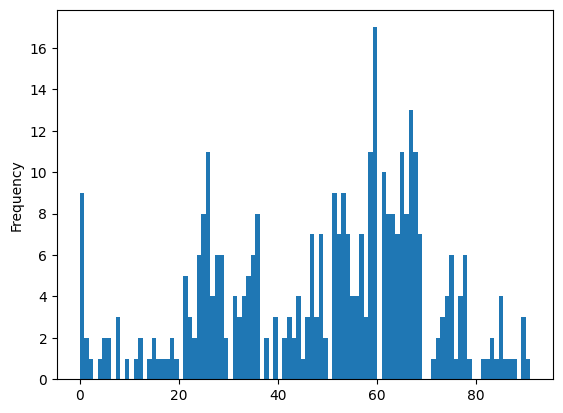

In [27]:
audio_feats_df['popularity'].plot.hist(bins=100)

In [28]:
audio_feats_df.to_csv("./data/kanyewest.csv", index=False)

In [29]:
df = pd.read_csv("./data/kanyewest.csv")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.2480,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4,91
1,0.724,0.573,7,-4.113,1,0.0549,0.11800,0.000000,0.5380,0.438,113.088,audio_features,4KW1lqgSr8TKrvBII0Brf8,spotify:track:4KW1lqgSr8TKrvBII0Brf8,https://api.spotify.com/v1/tracks/4KW1lqgSr8TK...,https://api.spotify.com/v1/audio-analysis/4KW1...,135920,4,90
2,0.639,0.628,6,-7.578,0,0.0399,0.03810,0.000000,0.3860,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4,90
3,0.374,0.568,1,-3.825,0,0.1090,0.21900,0.002190,0.5130,0.111,84.733,audio_features,3DK6m7It6Pw857FcQftMds,spotify:track:3DK6m7It6Pw857FcQftMds,https://api.spotify.com/v1/tracks/3DK6m7It6Pw8...,https://api.spotify.com/v1/audio-analysis/3DK6...,547733,4,90
4,0.542,0.466,0,-8.665,1,0.0831,0.14100,0.000445,0.1250,0.124,191.385,audio_features,7rbECVPkY5UODxoOUVKZnA,spotify:track:7rbECVPkY5UODxoOUVKZnA,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,https://api.spotify.com/v1/audio-analysis/7rbE...,243440,4,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.846,0.706,1,-6.701,1,0.3210,0.10800,0.000000,0.0387,0.421,99.995,audio_features,6Tj2eHQ2zAIgb4wxVFHBp8,spotify:track:6Tj2eHQ2zAIgb4wxVFHBp8,https://api.spotify.com/v1/tracks/6Tj2eHQ2zAIg...,https://api.spotify.com/v1/audio-analysis/6Tj2...,192640,4,0
356,0.901,0.470,1,-8.926,1,0.0945,0.00518,0.791000,0.0450,0.421,99.925,audio_features,7D6PaRc37JQALrMamQMJvP,spotify:track:7D6PaRc37JQALrMamQMJvP,https://api.spotify.com/v1/tracks/7D6PaRc37JQA...,https://api.spotify.com/v1/audio-analysis/7D6P...,193640,4,0
357,0.640,0.657,3,-2.639,0,0.0501,0.26800,0.000000,0.2040,0.370,141.906,audio_features,0NTTd0fqQXVNpLEHCELyao,spotify:track:0NTTd0fqQXVNpLEHCELyao,https://api.spotify.com/v1/tracks/0NTTd0fqQXVN...,https://api.spotify.com/v1/audio-analysis/0NTT...,191138,4,0
358,0.869,0.249,7,-20.657,1,0.1090,0.03270,0.856000,0.0796,0.739,90.021,audio_features,6tGBzlEQ75XQ92GjFZYXju,spotify:track:6tGBzlEQ75XQ92GjFZYXju,https://api.spotify.com/v1/tracks/6tGBzlEQ75XQ...,https://api.spotify.com/v1/audio-analysis/6tGB...,200150,4,0
